# Deep learning Image Recognizer
## Is it a Cat or a Dog?

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/zlim/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.164779,0.033295,0.010149,23:46


epoch,train_loss,valid_loss,error_rate,time
0,0.068543,0.023395,0.006089,34:28


#### Imported library with computer vision models
#### The downloaded dataset contains images of dogs and cats and it is used to train the model. A random validation set of 20% of the data is held out and the remaining 80% is used to train the model. The accuracy of the model is measured by the validation set, which is used to make sure the model is not memorizing the data instead of finding generalizable patterns in it.
#### A class such as ImageDataLoader, which can be used to load and process deep learning datasets for image recognition tasks. This class takes in information such as the type of data, how to get the labels from the dataset, and what transforms to apply. For example, we can tell fastai to resize all images to 224 pixels, which is the standard size for most historical models. Additionally, item_tfms and batch_tfms can be applied to each image, or batches of images, to help improve the accuracy of the model.
#### object learn creates a deep learning model with a convolutional neural network architecture to train on an image dataset, and uses an accuracy metric to measure how well it does.
#### learn.fine_tune method adapt a pre-trained model to a new dataset. It involves adjusting the parameters of the model to better fit the data, without having to start from scratch. This allows us to take advantage of the pretrained model's capabilities, while still having the flexibility to adjust it to fit our specific needs.


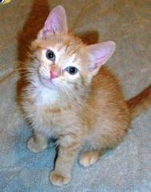

In [7]:
from fastbook import *
img = PILImage.create(image_cat())
img.to_thumb(192)

In [9]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [10]:
#hide
uploader = SimpleNamespace(data = ['images/cat.jpeg'])

In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [12]:
uploader = SimpleNamespace(data = ['images/dog.jpeg'])

In [13]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000002


# Segmentation model

In [14]:

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)
     

epoch,train_loss,valid_loss,time
0,2.666889,3.913299,00:48


epoch,train_loss,valid_loss,time
0,2.161325,1.980366,00:51
1,1.808745,1.438990,00:51
2,1.579829,1.245564,00:51
3,1.417698,1.013839,00:51
4,1.264496,0.916104,00:51
5,1.139177,0.837764,00:52
6,1.036962,0.788106,00:52
7,0.958308,0.768143,00:51


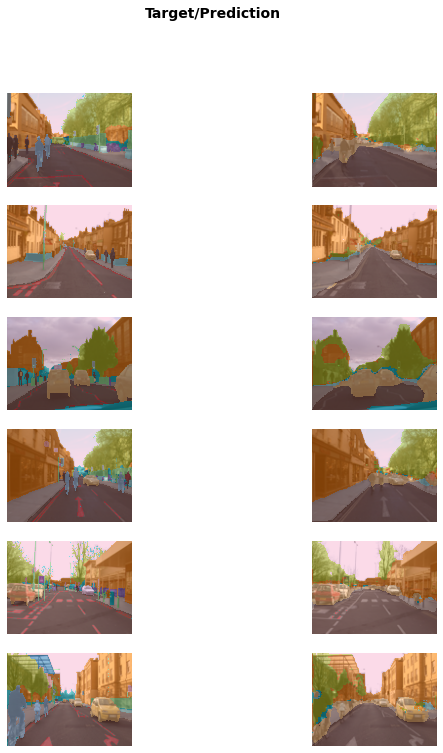

In [16]:
learn.show_results(max_n=6, figsize=(10,12))

#### A segmentation model is a type of machine learning model that is used to identify the content of each pixel in an image. For example, it can be used to recognize objects like cars and trees in a picture. To train such a model, we can use a dataset such as the Camvid dataset. After training, the model can accurately classify each pixel in an image, providing a color-coded representation of the objects in the image

# Build models from csv

In [28]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
     

#### To train a model to predict whether a person is a high-income earner based on their socioeconomic background, we need to define which columns of data contain categorical values (like occupation) and which contain continuous values (like age). We then use a method called fit_one_cycle to train the model from scratch, without relying on a pre-trained model.

In [31]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-acdm,Never-married,Other-service,Unmarried,White,False,22.000000,38251.001900,12.0,<50k
1,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,False,60.000001,355864.998414,14.0,>=50k
2,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,False,35.000000,166415.999931,9.0,<50k
3,?,Assoc-acdm,Never-married,?,Not-in-family,White,False,27.000000,29361.001586,12.0,<50k
4,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,23.000001,82776.999054,9.0,<50k
5,Private,Some-college,Never-married,Transport-moving,Own-child,Black,False,21.000000,319163.002337,10.0,<50k
6,Private,Assoc-voc,Married-spouse-absent,#na#,Unmarried,White,True,46.000000,197730.999991,10.0,<50k
7,Private,HS-grad,Married-spouse-absent,Sales,Unmarried,Black,False,39.000000,139703.000908,9.0,<50k
8,Private,HS-grad,Widowed,Machine-op-inspct,Not-in-family,Black,False,53.000000,167170.000349,9.0,<50k
9,Private,HS-grad,Separated,Machine-op-inspct,Own-child,White,False,20.000001,161978.001434,9.0,<50k


In [30]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.384136,0.368145,0.830774,00:03
1,0.360955,0.357871,0.832924,00:03
2,0.351502,0.356444,0.834767,00:03


#### This model is able to accurately predict whether or not an individual has an annual income greater than $50k based on their demographic data. It takes around 10 seconds to train, and is over 80% accurate.

# Movie Recommendation System
## Collaborative filtering

In [33]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.511735,1.408650,00:00


epoch,train_loss,valid_loss,time
0,1.370400,1.345145,00:00
1,1.252128,1.154146,00:00
2,1.013602,0.861401,00:00
3,0.796585,0.729984,00:00
4,0.690469,0.695163,00:00
5,0.651218,0.683151,00:00
6,0.624736,0.677507,00:00
7,0.624774,0.674247,00:00
8,0.622360,0.672738,00:00
9,0.611560,0.672666,00:00


#### Recommendation systems use data to suggest products or movies that people might like. To train a model that will predict what movies people might like, based on their viewing habits, we can use the MovieLens dataset. This dataset contains information about users, ratings, and genres of movies, which can be used to build a model that predicts what movies people are likely to enjoy.
####  This model can be used to predict movie ratings on a scale of 0.5 to 5.0. By using the y_range parameter, using fine_tune feature to make predictions with an average error of around 0.6.

In [34]:
dls.show_batch()

,userId,movieId,rating
0,150,231,3.0
1,268,1198,5.0
2,355,316,4.0
3,380,1704,4.0
4,461,8961,4.5
5,56,8961,4.0
6,312,50,5.0
7,615,58559,4.5
8,346,2762,1.0
9,242,858,5.0


In [35]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,15.0,27.0,3.5,3.736767
1,65.0,89.0,3.0,3.951963
2,79.0,79.0,4.5,4.263017
3,1.0,87.0,2.0,3.289732
4,74.0,38.0,4.0,4.417749
5,29.0,14.0,5.0,4.312814
6,79.0,58.0,5.0,4.174130
7,27.0,29.0,5.0,4.133899
8,68.0,6.0,4.0,4.162781


#### show_results is a way to view examples of user and movie IDs, actual ratings, and predictions. This shows a better understanding of how a predictive model is performing.

In [36]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,0.618353,0.667184,00:00
1,0.609688,0.662024,00:00
2,0.602680,0.660533,00:00


In [37]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,92.0,49.0,4.0,4.167274
1,96.0,77.0,1.5,3.481740
2,14.0,53.0,3.0,3.969898
3,70.0,30.0,3.5,3.483542
4,36.0,9.0,4.5,4.005771
5,49.0,38.0,5.0,4.471899
6,95.0,61.0,5.0,4.355451
7,33.0,4.0,3.5,3.549163
8,48.0,24.0,3.0,3.494983
